In [120]:
function lamb(t,T)
   sin(pi*t/(2*T))^2 
    #0.5
end;

function F1(t,hx,hz,T)
    omega=pi/(2*T)
    denom=2*(hx^2*(1-lamb(t,T))^2+hz^2 * lamb(t,T)^2)
    num=hx*hz*2*omega*cos(omega*t)*sin(omega*t)
    
    num/denom
   #0.0
    
end

function F1dum(t,hx,hz,T)
    
   0.0
    
end
#p contains the parameters 
#in the order p[1]=lamb(t,T); p[2]=F1(t,hx,hz,T), p[3]=hx, p[4]=hz


function precession!(du,u,p,t)
    #du[1]=-2*hz*lamb(t,T)*u[2]+2*F1(t,hx,hz,T)*u[3]
    #du[2]=2*hz*lamb(t,T)*u[1]-2*hx*(1-lamb(t,T))*u[3]
    #du[3]=-2*F1(t,hx,hz,T)*u[1]+2*hx*(1-lamb(t,T))*u[2]
    
    du[1]=-2*p[4]*p[1](t)*u[2]+2*p[2](t)*u[3]
    du[2]=2*p[4]*p[1](t)*u[1]-2*p[3]*(1-p[1](t))*u[3]
    du[3]=-2*p[2](t)*u[1]+2*p[3]*(1-p[1](t))*u[2]
    
    
 
end

#for this function p[1]=hx, p[2]=hz,p[3]=T
function precession2!(du,u,p,t)
    du[1]=-2*p[2]*lamb(t,p[3])*u[2]-2*F1(t,p[1],p[2],p[3])*u[3]
    du[2]=2*p[2]*lamb(t,p[3])*u[1]-2*p[1]*(1-lamb(t,p[3]))*u[3]
    du[3]=2*F1(t,p[1],p[2],p[3])*u[1]+2*p[1]*(1-lamb(t,p[3]))*u[2]
    
    
 
end

precession2! (generic function with 1 method)

In [121]:
LinRange(0,10,100)

100-element LinRange{Float64}:
 0.0,0.10101,0.20202,0.30303,0.40404,…,9.59596,9.69697,9.79798,9.89899,10.0

In [122]:
ts=LinRange(0,T,100)
size(ts)

(100,)

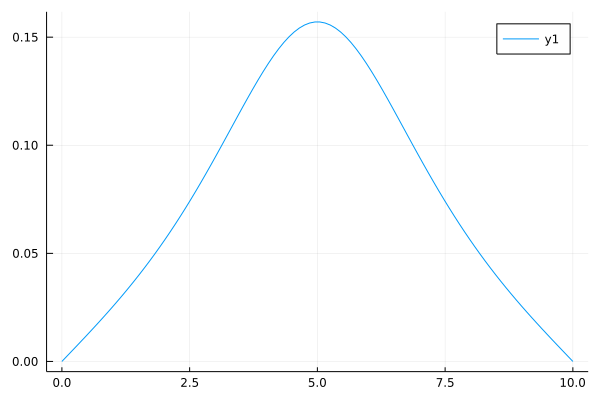

In [123]:
hx=1
hz=1
T=10
pts=100
ts=LinRange(0,T,pts)
Fs=zeros(Float64,pts)

for i in 1:pts
   Fs[i]=F1(ts[i],hx,hz,T) 
end

plot(LinRange(0,T,pts),Fs)

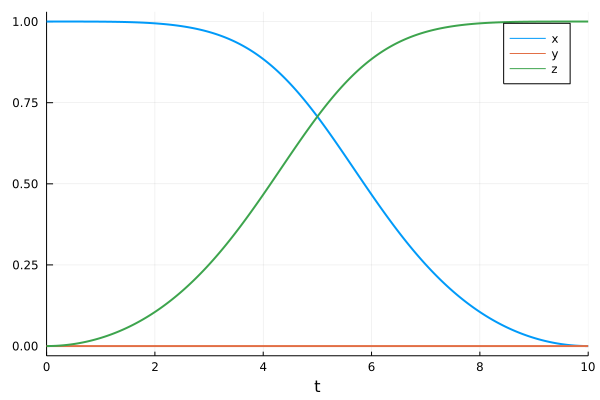

In [124]:
#Define the parameters

T=10.0
hx=1.0
hz=1.0

#u0=[1/sqrt(2);0.0;1/sqrt(2)]
u0=[1;0.0;0.0]
tspan=(0.0,T)


p=[hx;hz;T]

prob = ODEProblem(precession2!,u0,tspan,p)
sol = solve(prob)

plot(sol,linewidth=2,xaxis="t",label=["x" "y" "z"])

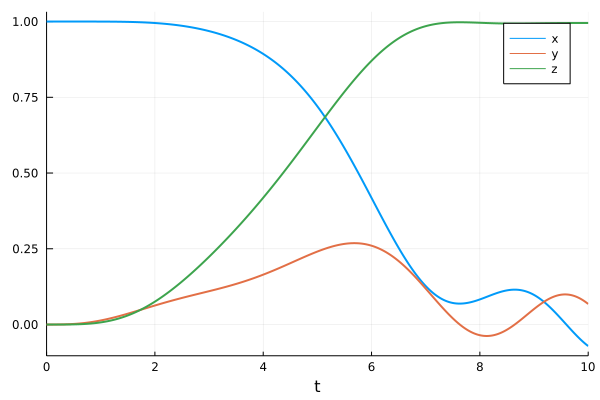

In [125]:

#u0=[1/sqrt(2);0.0;1/sqrt(2)]
u0=[1;0.0;0.0]
tspan=(0.0,T)

#p=[0.0;0.0]
p1=t->lamb(t,T)
p2=t->F1dum(t,hx,hz,T)
#p2=0.0
p=[p1;p2;hx;hz]

prob = ODEProblem(precession!,u0,tspan,p)
sol = solve(prob)

plot(sol,linewidth=2,xaxis="t",label=["x" "y" "z"])

In [13]:
lamb(0,1)

0.0

In [8]:
cos(pi)

-1.0

In [3]:
f(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8);

In [15]:
Mat=zeros(Float64,(3,3))

Mat[1,2]=
#f(u,p,t)=

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

# Numerical evaluation of perturbative amplitudes

In [ ]:
#Here I compute (up to third order) the amplitudes of the unitary transformation that diagonalizes the very simple
#Hamiltonian hz \sigma_{z} in the eigenbasis of \sigma_{x}. 
#This is a proof of concept of adiabatic evolution to estimate the amplitudes that parameterize a unitary 
#transformation from the initial state (an eigenstate of \sigma_{x}) to one of \sigma_{z}

In [139]:
using HCubature

In [185]:
#function that determines the protocol that deforms the Hamiltonian from its initial (t=0)
#to its final form (t=T)
function lamb(t,T)
   sin(pi*t/(2*T))^2 
    #0.5
end; 

#These are the zeroth-order amplitudes

function fz_0(t,hz,hx,T)
    
    lamb(t,T)*hz*cos(2*hx*(1-lamb(t,T))*t)
    
end

function fy_0(t,hz,hx,T)
    
    lamb(t,T)*hz*sin(2*hx*(1-lamb(t,T))*t)
    
end


#compute the first order amplitude for the generator \sigma_z

function fz_1(t,hz,hx,T) #the integration is done from t1=0 to t1=t
    integ=t1->lamb(t1,T)*hz*cos(2*hx*(1-lamb(t1,T))*t1)
    
    a,b=hquadrature(integ, 0, t)
    a
    
end

#compute the first order amplitude for the generator \sigma_y

function fy_1(t,hz,hx,T) #the integration is done from t1=0 to t1=t
    integ=t1->lamb(t1,T)*hz*sin(2*hx*(1-lamb(t1,T))*t1)
    
    a,b=hquadrature(integ, 0, t)
    a
   
end

#integrand to compute the third order amplitude for the generator \sigma_z

function fz_3(t,hz,hx,T)
    
    integ=t1->fy_1(t1,hz,hx,T)*(fy_0(t1,hz,hx,T)*fz_1(t1,hz,hx,T)-fz_0(t1,hz,hx,T)*fy_1(t1,hz,hx,T))
    
    
    a,b=hquadrature(integ, 0, t)
    
    -(7/3)*a #we scale by the factor that depends on the second bernoulli number
    
end

function fy_3(t,hz,hx,T)
    
    integ=t1->fz_1(t1,hz,hx,T)*(fy_0(t1,hz,hx,T)*fz_1(t1,hz,hx,T)-fz_0(t1,hz,hx,T)*fy_1(t1,hz,hx,T))
    
    
    a,b=hquadrature(integ, 0, t)
    
    (7/3)*a
    
end




fy_3 (generic function with 1 method)

In [180]:
#Parameters of the model
hx=1
hz=1
T=1


1

In [195]:
sqrt((0.258*sin(0.5))^2+cos(0.5)^2)

0.8862566285169136

In [196]:
1/sqrt(2)

0.7071067811865475

In [194]:
sqrt(0.47^2+0.14^2)

0.49040799340956914

In [193]:
0.14/sqrt(0.47^2+0.14^2)

0.285476586600165

In [190]:
fz_3(T,hz,hx,T)

0.006744751872691779

In [188]:
fz_1(T,hz,hx,T)

0.47631602595431993

In [198]:
fy_1(T,hz,hx,T)

0.12156856017654209

In [187]:
#The amplitude/i of the sigma_z generator
fz_3(T,hz,hx,T)-fz_1(T,hz,hx,T)

-0.46957127408162813

In [186]:
#The amplitude/i of the sigma_y generator
fy_3(T,hz,hx,T)-fy_1(T,hz,hx,T)

-0.14228194117810933

In [181]:
fz_3(T,hz,hx,T)

-0.011562431781757336

In [197]:
fy_3(T,hz,hx,T)

-0.020713381001567242